Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving vegetation segmentation.v2i.yolov8.zip to vegetation segmentation.v2i.yolov8.zip
✅ Dataset extracted to: /content/vegetation_segmentation_dataset
Contents: ['test', 'README.dataset.txt', 'train', 'README.roboflow.txt', 'data.yaml', 'valid']
✅ Data YAML ready at: /content/vegetation_segmentation_dataset/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['vegetation']

roboflow:
  workspace: blue-halo
  project: vegetation-segmentation
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/blue-halo/vegetation-segmentation/dataset/2Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engi

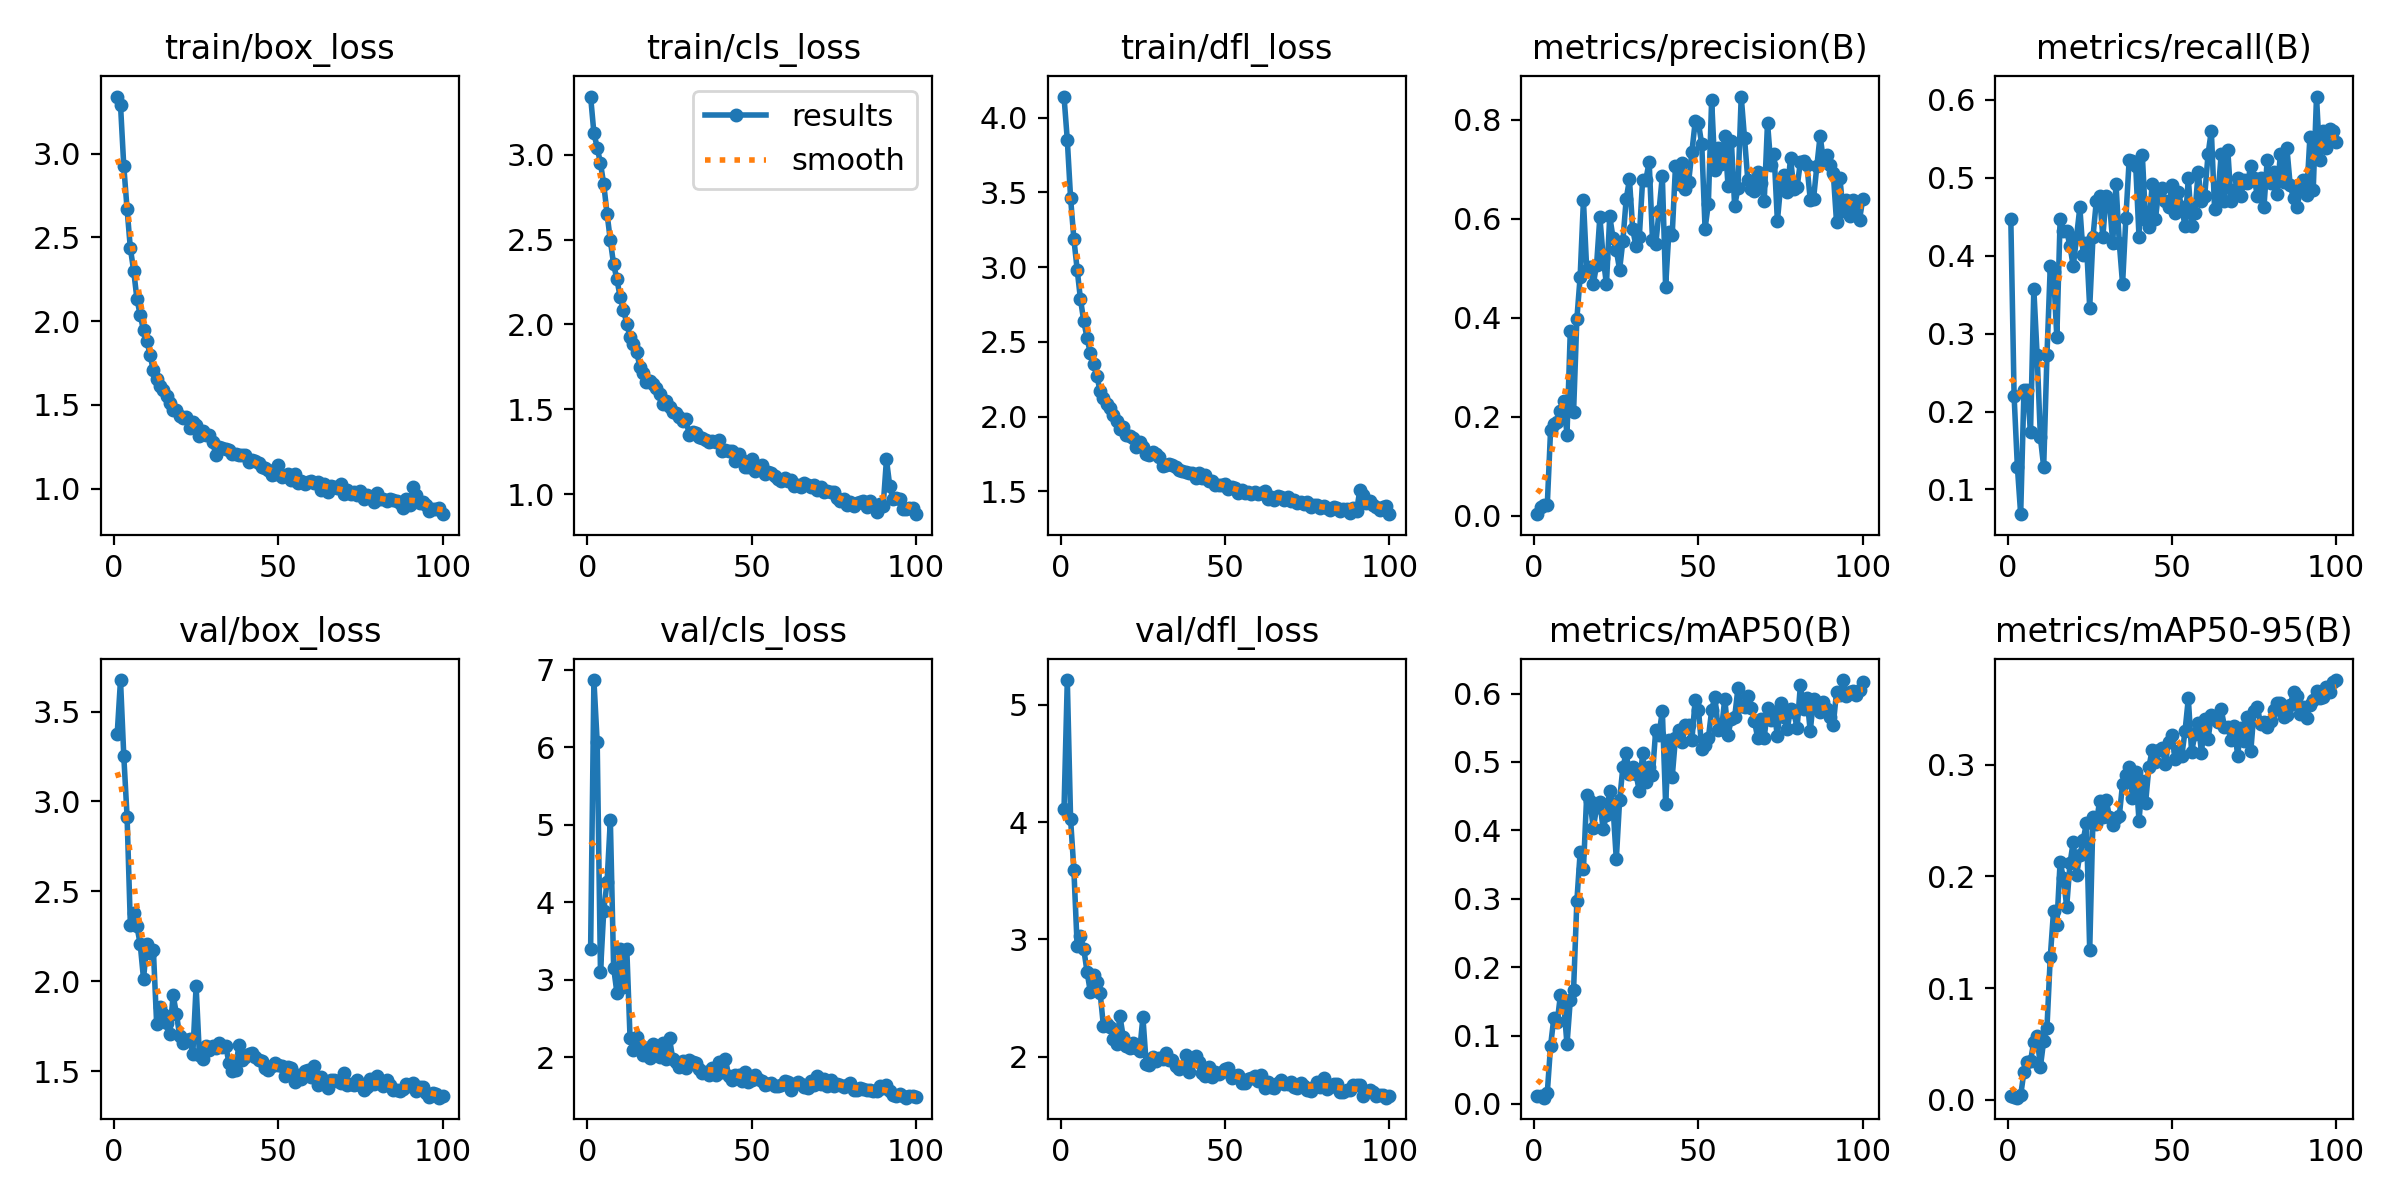

✅ Training complete and copied to Drive.


In [ ]:
# ============================================
# 🪴 YOLOv8 Vegetation Segmentation – Train From Scratch
# ============================================

# Step 1. Install dependencies
!pip install ultralytics==8.* torch torchvision --quiet

# Step 2. (Optional) Mount Google Drive to save models/runs
from google.colab import drive
drive.mount('/content/drive')

# Step 3. Upload your dataset zip
# 👉 Use the Colab file browser (left panel > Files > Upload) or run the below cell
from google.colab import files
uploaded = files.upload()  # Upload your "vegetation segmentation.v2i.yolov8.zip"

# Step 4. Unzip dataset
import zipfile, os

dataset_zip = list(uploaded.keys())[0]  # Use the uploaded zip filename
dataset_dir = "/content/vegetation_segmentation_dataset"

os.makedirs(dataset_dir, exist_ok=True)
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("✅ Dataset extracted to:", dataset_dir)
print("Contents:", os.listdir(dataset_dir))

# Step 5. Check if a data.yaml exists (Roboflow exports usually include one)
data_yaml = os.path.join(dataset_dir, "data.yaml")
if not os.path.exists(data_yaml):
    # If not, create a simple one manually
    data_yaml = os.path.join(dataset_dir, "data_custom.yaml")
    with open(data_yaml, "w") as f:
        f.write("""# YOLOv8 dataset config
train: {}/train/images
val: {}/valid/images

nc: 1
names: ['vegetation']
""".format(dataset_dir, dataset_dir))

print("✅ Data YAML ready at:", data_yaml)
!cat {data_yaml}

# Step 6. Import YOLO and start training (from scratch)
from ultralytics import YOLO

# Create model from YAML (random weights = training from scratch)
model = YOLO("yolov8n.yaml")  # or yolov8m.yaml for larger model

# Start training
results = model.train(
    data=data_yaml,       # path to data.yaml
    epochs=100,           # number of epochs
    imgsz=640,            # image size
    batch=16,             # adjust based on GPU memory
    project="/content/runs/train",
    name="vegetation_yolov8_scratch",
    device=0,             # set to 0 for GPU, 'cpu' for CPU
)

# Step 7. View training results
from IPython.display import Image, display
display(Image(filename=f"/content/runs/train/vegetation_yolov8_scratch/results.png"))

# Step 8. (Optional) Copy results to Google Drive
!cp -r /content/runs/train /content/drive/MyDrive/
print("✅ Training complete and copied to Drive.")
